<a href="https://colab.research.google.com/github/leekj3133/dss_JU/blob/main/Dacon/Lv3.%20%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%EA%B3%BC%20LGBM%20%EB%AA%A8%EB%8D%B8%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EC%99%80%EC%9D%B8%20%ED%92%88%EC%A7%88%20%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0/Lv3_%EB%AA%A8%EB%8D%B8%EB%A7%81_4_4_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EC%A0%95%EC%9D%98%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [2]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2021-09-13 08:37:40--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2021-09-13 08:37:40--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 173.194.216.113, 173.194.216.101, 173.194.216.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/avq4rc1vsdplfe00p5dgl0q20gnqu7mk/1631522250000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2021-09-13 08:37:41--  https://doc-10-10-docs.googleusercontent.com/docs/secur

In [3]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0.429752,0.0,1.0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0.785124,1.0,0.0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0.223140,0.0,1.0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0.280992,0.0,1.0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0.247934,0.0,1.0


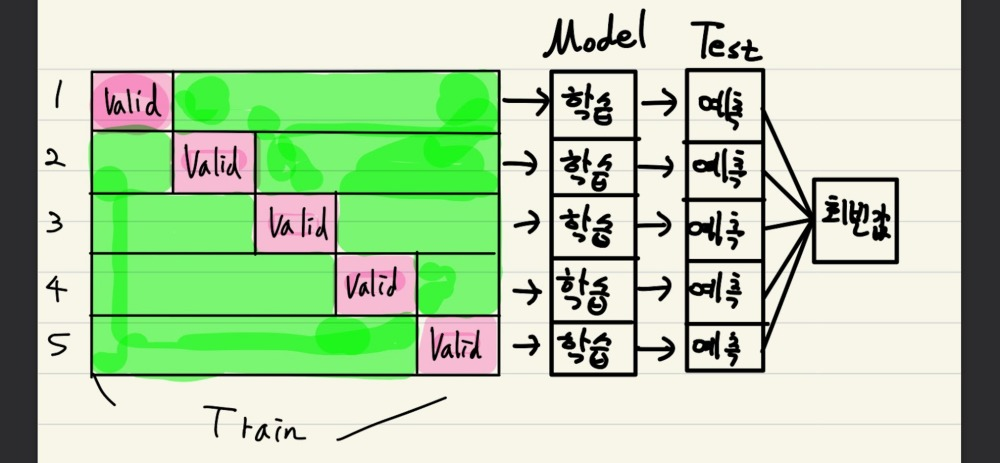

1. K-Fold를 이용해서 Train과 Valid Data를 나눈다.
2. Model을 이용해서 train 데이터를 학습한다.
3. Model을 이용해서 valid 데이터를 예측해 성능을 확인한다.
4. Model을 이용해서 test 데이터를 예측한다.
5. n_splits를 5로 설정한다면, 5개의 결과값들에 대한 “최빈값”을 이용해 가장 등장할 가능성이 높은 결과값으로 결정한다.
6. 결과를 제출한다.


## 👋 실습
---

In [9]:
# "X"라는 변수에 train의 "index"와 "quality"를 제외하고 지정해 주세요
# "y"라는 변수에는 "quality"를 지정해 주세요
X = train.drop(["index","quality"],axis=1)
y = train["quality"]

In [10]:
# "kf"라는 변수에 KFold를 지정해 줍시다.
# n_splits는 5, shuffle은 True, random_state는 0으로 설정해주세요
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [11]:
# "model"이라는 변수에 RandomForestClassifier를 지정해 줍시다.
# valid_scores라는 빈 리스트를 하나 만들어줍시다.
# test_predictions라는 빈 리스트를 하나 만들어 줍시다.
model = RandomForestClassifier()
valid_scores = []
test_predictions = []

In [ ]:
# 앞의 문제에 이어서 반복문 속에서 model.fit(X_tr, y_tr)을 활용해 모델을 학습해봅시다

In [ ]:
# 앞의 문제에 이어서 반복문 속에서 "valid_prediction"이라는 변수에 model.predict(X_val)의 결과를 저장해 봅시다. 

In [ ]:
# 앞의 문제에 이어서 반복문 속에서 accuracy_score를 이용해, 모델이 어느정도의 예측 성능이 나올지 확인해봅시다.
# 그리고 "valid_prediction"의 점수를 scores에 저장 해봅시다. 
# 반복문에서 빠져나온 후에 np.mean()을 활용해 평균 점수를 예측해봅시다.

In [14]:
# 지난 시간에 다루었던 kf.split()을 활용해, 반복문으로 X_tr, y_tr, X_val, y_val을 설정해봅시다.
for train_idx, valid_idx in kf.split(X,y):
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]
  X_val = X.iloc[valid_idx]
  y_val= y.iloc[valid_idx]
  model.fit(X_tr, y_tr)
  valid_prediction=model.predict(X_val)
  score = accuracy_score(y_val,valid_prediction)
  valid_scores.append(score)
  print(score)
print("평균 점수 : ",np.mean(valid_scores))

0.6945454545454546
0.6872727272727273
0.6533212010919017
0.6642402183803457
0.6760691537761602
평균 점수 :  0.6774232773595831


In [19]:
# 이제 어느정도의 성능이 나올지 알게 되었으니, 반복문 속에서 test를 예측해 "test_prediction"이라는 변수에 지정해봅시다.
# test_prediction을 지정했다면, "test_precitions"라는 빈 리스트에 넣어줍시다.
for train_idx, valid_idx in kf.split(X,y):
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]
  X_val = X.iloc[valid_idx]
  y_val= y.iloc[valid_idx]
  model.fit(X_tr, y_tr)
  test_prediction=model.predict(test.drop(columns=["index"]))
  test_predictions.append(test_prediction)


In [21]:
# 이제 결과 값을 만들어 보겠습니다.
# "test_precitions"를 Data Frame으로 만들어주세요
test_precitions = pd.DataFrame(test_predictions)

In [23]:
# DF.mode()를 활용해 열별 최빈값을 확인하고, "test_prediction"이라는 변수에 지정해봅시다.
# "test_prediction"의 첫 행을 최종 결과값으로 사용합시다.
test_prediction = test_precitions.mode()
test_prediction = test_prediction[0]

In [24]:
# data의 sample_submission 파일을 불러와 "quality"라는 변수에 "test_precition"을 저장해줍시다.
# 그 이후에는, "data/submission_KFOLD.csv"에 저장하고, 제출해봅시다.
sample_submission = pd.read_csv('data/sample_submission.csv')

sample_submission['quality'] = test_prediction

sample_submission.to_csv('data/submission_KFOLD.csv', index=False)

## 정답
---

In [ ]:
# "X"라는 변수에 train의 "index"와 "quality"를 제외하고 지정해 주세요
# "y"라는 변수에는 "quality"를 지정해 주세요

X = train.drop(columns = ['index','quality'])
y = train['quality']

In [ ]:
# "kf"라는 변수에 KFold를 지정해 줍시다.
# n_splits는 5, shuffle은 True, random_state는 0으로 설정해주세요

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [ ]:
# "model"이라는 변수에 RandomForestClassifier를 지정해 줍시다.
# valid_scores라는 빈 리스트를 하나 만들어줍시다.
# test_predictions라는 빈 리스트를 하나 만들어 줍시다.

model = RandomForestClassifier(random_state = 0)
valid_scores = []
test_predictions = []

In [ ]:
# 지난 시간에 다루었던 kf.split()을 활용해, 반복문으로 X_tr, y_tr, X_val, y_val을 설정해봅시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

In [ ]:
# 앞의 문제에 이어서 반복문 속에서 model.fit(X_tr, y_tr)을 활용해 모델을 학습해봅시다

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

In [ ]:
# 앞의 문제에 이어서 반복문 속에서 "valid_prediction"이라는 변수에 model.predict(X_val)의 결과를 저장해 봅시다. 

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)

In [ ]:
# 앞의 문제에 이어서 반복문 속에서 accuracy_score를 이용해, 모델이 어느정도의 예측 성능이 나올지 확인해봅시다.
# 그리고 "valid_prediction"의 점수를 scores에 저장 해봅시다. 
# 반복문에서 빠져나온 후에 np.mean()을 활용해 평균 점수를 예측해봅시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)
  score = accuracy_score(y_val, valid_prediction)
  valid_scores.append(score)
  print(score)
print('평균 점수 : ', np.mean(valid_scores))

In [ ]:
# 이제 어느정도의 성능이 나올지 알게 되었으니, 반복문 속에서 test를 예측해 "test_prediction"이라는 변수에 지정해봅시다.
# test_prediction을 지정했다면, "test_precitions"라는 빈 리스트에 넣어줍시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

  test_prediction = model.predict(test.drop(columns = ['index']))
  test_predictions.append(test_prediction)

In [ ]:
# 이제 결과 값을 만들어 보겠습니다.
# "test_precitions"를 Data Frame으로 만들어주세요

test_predictions = pd.DataFrame(test_predictions)
test_predictions

In [ ]:
# DF.mode()를 활용해 열별 최빈값을 확인하고, "test_prediction"이라는 변수에 지정해봅시다.
# "test_prediction"의 첫 행을 최종 결과값으로 사용합시다.

test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]
test_prediction

In [ ]:
# data의 sample_submission 파일을 불러와 "quality"라는 변수에 "test_precition"을 저장해줍시다.
# 그 이후에는, "data/submission_KFOLD.csv"에 저장하고, 제출해봅시다.

sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('data/submission_KFOLD.csv', index=False)

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)